## Import Libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the `Cars.csv` Dataset

In [2]:
# load the `Cars.csv` dataset
cars = pd.read_csv('Data Sets/Cars.csv')

In [3]:
# display the first five rows of the dataset
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


## Feature Data types

In [4]:
# check data types
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


## Missing Value Check

In [5]:
# check for missing values
cars.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

## Check for Multi-Collinearity

In [6]:
# check correlation between variables

corel = cars.corr().round(2)
corel

,HP,MPG,VOL,SP,WT
HP,1.00,-0.73,0.08,0.97,0.08
MPG,-0.73,1.00,-0.53,-0.69,-0.53
VOL,0.08,-0.53,1.00,0.10,1.00
SP,0.97,-0.69,0.10,1.00,0.10
WT,0.08,-0.53,1.00,0.10,1.00


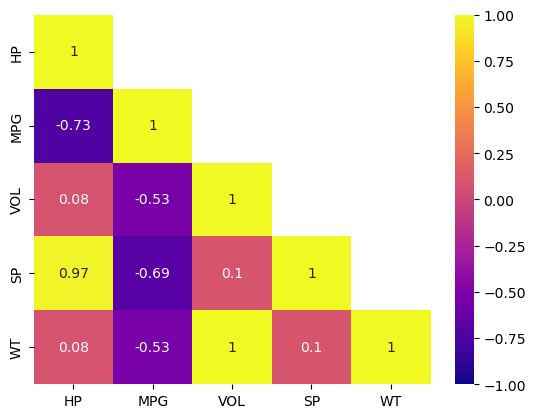

In [7]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(corel, 
            annot=True,
            mask=np.triu(corel,1),
            vmin=-1,
            vmax=1,
            cmap='plasma');

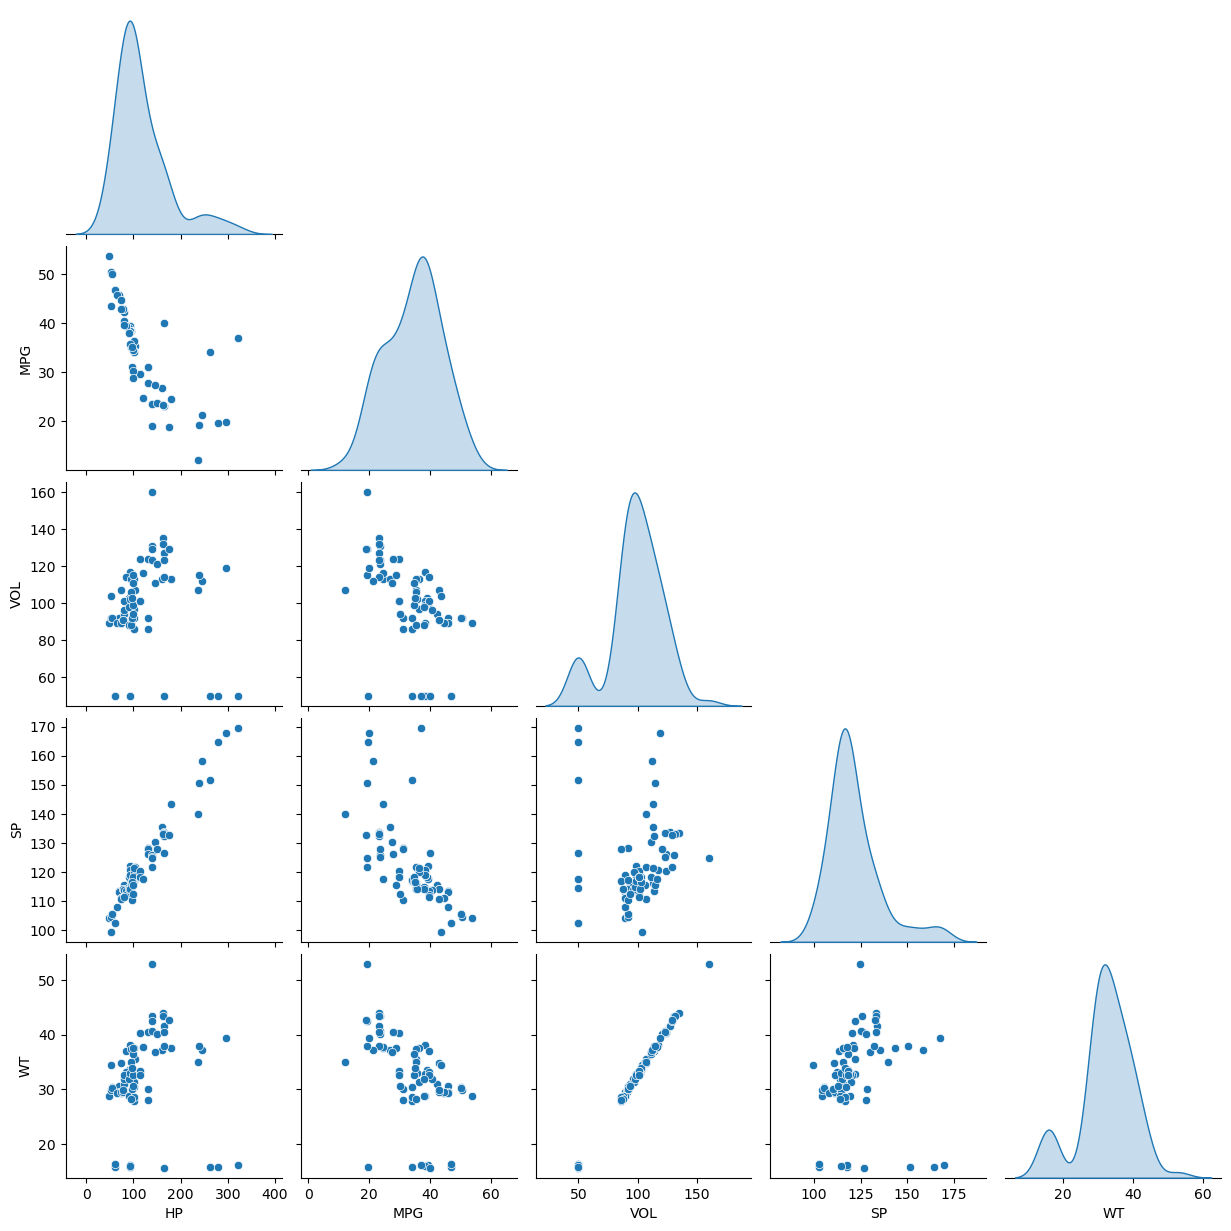

In [8]:
# pairplot
sns.pairplot(cars,
            corner=True,
            diag_kind='kde');

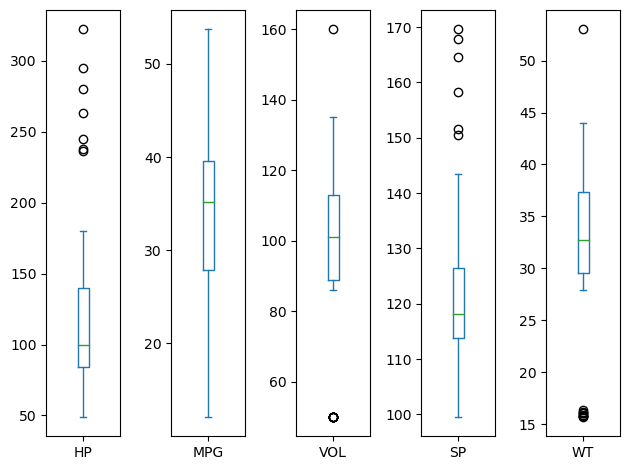

In [9]:
cars.plot(kind='box', subplots=True)
plt.tight_layout();

## Multiple Linear Regression Model using statsmodels library

In [10]:
# build a multiple linear regression model using statsmodels library & print its summary
from statsmodels.formula.api import ols
formula = 'MPG ~ HP+VOL+SP+WT'
model = ols(formula=formula, data=cars).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           1.54e-23
Time:                        08:05:20   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.0

## Simple Linear Regression with each independent feature vs the target feature MPG

In [11]:
# VOL vs MPG
formula = 'MPG ~ VOL'
sl_vol = ols(formula=formula, data=cars).fit()
print(sl_vol.summary())


                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           3.82e-07
Time:                        08:12:37   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.0

In [12]:
# WT vs MPG
formula = 'MPG ~ WT'
sl_wt = ols(formula=formula, data=cars).fit()
print(sl_wt.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           4.38e-07
Time:                        08:14:35   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.0

## Multiple Linear Regression with `VOL` & `WT` vs `MPG`

In [13]:
# VOL + WT vs MPG
formula = 'MPG ~ VOL+WT'
sl_vol_wt = ols(formula=formula, data=cars).fit()
print(sl_vol_wt.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           2.43e-06
Time:                        08:15:15   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.0

## Linear Regression Assumptions
### There should not be high correlation between independent features (Multi-Collinearity)
### Linear Relationship between Independent features and Target Feature
### Independence of Prediction Error (Residuals) - No Auto Correlation
### Standardized Residuals should be normally distributed with mean of zero
### Equality of Variance (Homoscedasticity) - The variance of residuals should be equal across different values of the predicted value of target variable

In [ ]:
range(12) # --> 0 to 11

In [14]:
# calculate VIF for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(cars.values, i) for i in range(cars.shape[1])]
vif['features'] = cars.columns
vif.round(1)

,VIF Factor,features
0,78.9,HP
1,63.5,MPG
2,12712.5,VOL
3,435.2,SP
4,12179.4,WT


Features having VIF more than 10 to be considered for deletion. Deletion is done one at a time with the feature with the highest VIF dropped from the data and the model is trained again on the remaining features. This stepwise process is repeated till the remaining independent features all have VIF lower than 10.

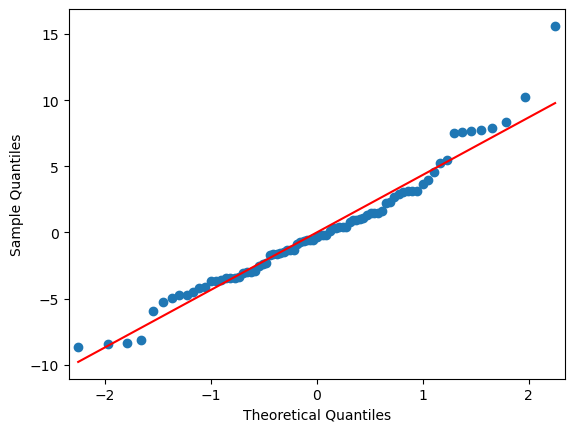

In [15]:
# check for the normality of the residuals - qqplot
from statsmodels.api import qqplot
qqplot(model.resid, line='s');

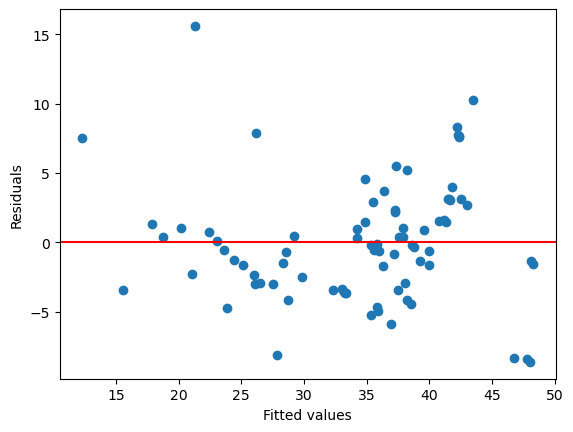

In [16]:
# check for homoscedasticity - residuals vs fitted values
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-');

In [18]:
# Observation deletion diagnostics - detect influential observations
# get cook's distance
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance
c

array([6.04797739e-02, 2.80207825e-02, 1.84833331e-02, 7.27752720e-03,
       2.96019879e-02, 4.81278004e-03, 2.07405847e-02, 2.55586700e-03,
       4.05692942e-03, 7.54004910e-04, 2.97311924e-03, 8.72887201e-02,
       3.32487183e-04, 3.06716174e-03, 5.27414633e-03, 5.29293219e-03,
       1.16531605e-03, 7.63273362e-02, 6.47114749e-04, 5.79692771e-04,
       1.13359020e-05, 1.03054091e-02, 1.53244850e-04, 3.10730928e-04,
       1.49488694e-03, 5.85742198e-02, 1.00598054e-02, 6.55605611e-05,
       3.30438001e-02, 1.81295962e-04, 1.33814932e-02, 9.97753151e-04,
       4.02570308e-04, 1.13711936e-03, 2.85608656e-03, 4.41332141e-05,
       3.27632348e-04, 4.70959014e-03, 1.21704644e-02, 8.96948188e-03,
       2.35324656e-04, 9.75839299e-06, 4.49488700e-03, 4.48437031e-03,
       1.02593360e-05, 4.75617324e-04, 2.22586830e-05, 4.66305687e-05,
       1.27051048e-02, 5.33728062e-03, 2.98638028e-03, 5.00671925e-03,
       1.29659561e-04, 1.14393086e-02, 8.61438068e-04, 2.46695414e-04,
      

In [19]:
#  greater than 4/no of observations
4/cars.shape[0] # 0.05

0.04938271604938271

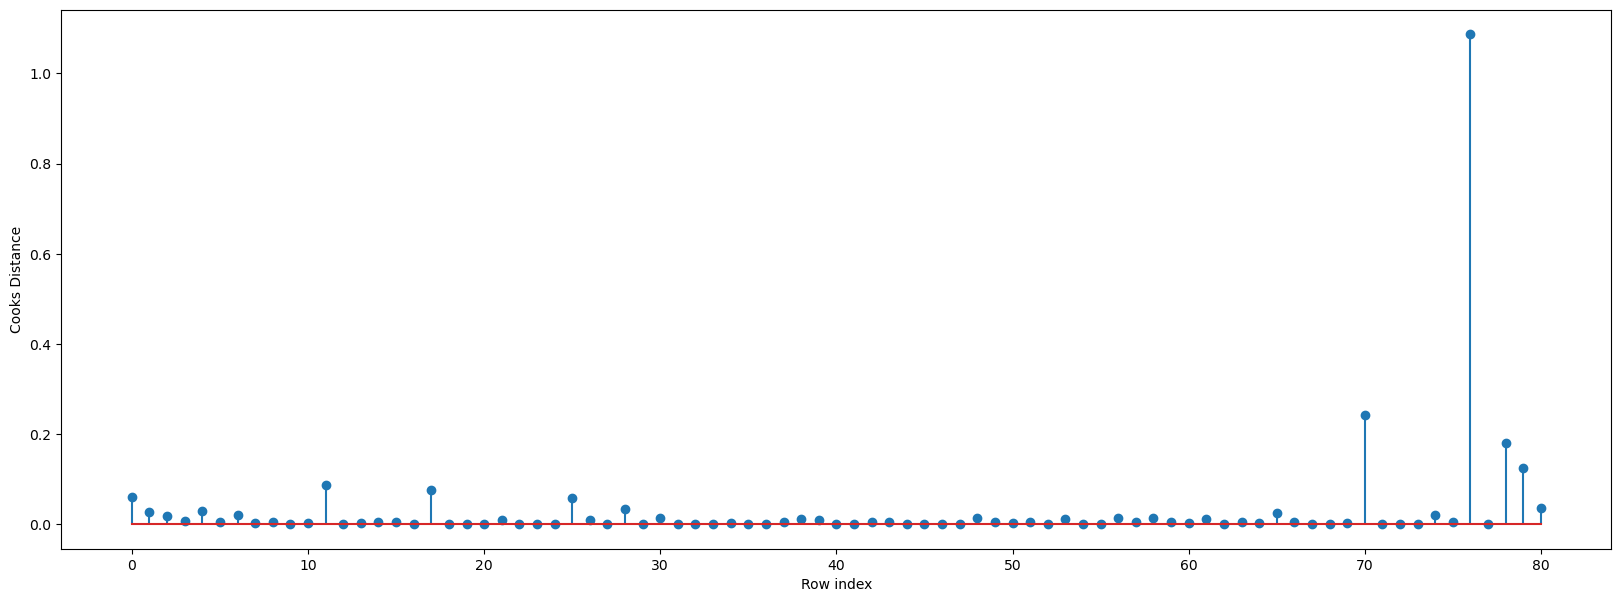

In [20]:
# plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [21]:
# thumb rule for cook's distance - if cooks distance > 4/n, then the data point is influential
4/cars.shape[0]

0.04938271604938271

In [22]:
# check which data points are influencers
cgreater = c>0.05
cgreater


array([ True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True,  True, False])

In [23]:
# get the index of elements of cgreater where cgreater is True
idx_drop = np.where(cgreater)
idx_drop

(array([ 0, 11, 17, 25, 70, 76, 78, 79]),)

In [25]:
idx_drop[0]

array([ 0, 11, 17, 25, 70, 76, 78, 79])

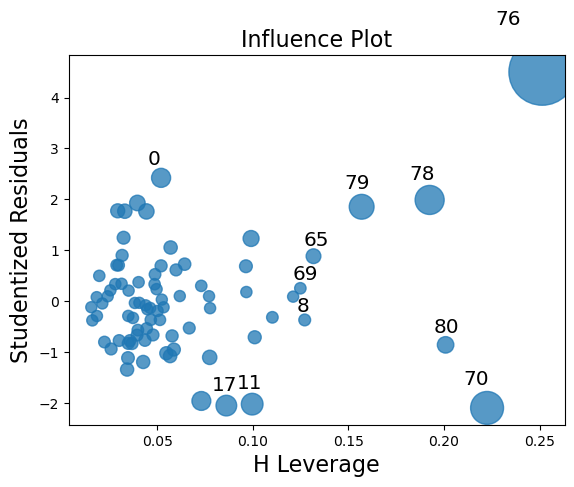

In [28]:
# influence plot
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model);

In [26]:
# improving the model by removing the outliers/influencers
cars_new = pd.read_csv('Data Sets/Cars.csv')
cars_new = cars_new.drop(idx_drop[0],axis=0).reset_index(drop=True)
cars_new.head()

,HP,MPG,VOL,SP,WT
0,55,50.013401,92,105.461264,30.466833
1,55,50.013401,92,105.461264,30.193597
2,70,45.696322,92,113.461264,30.632114
3,53,50.504232,92,104.461264,29.889149
4,70,45.696322,89,113.185353,29.591768


In [27]:
cars_new.to_csv('cars_cook.csv', index=False)

In [ ]:
# train a fresh linear regression model on the new dataset